In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
print(os.getcwd())  # Check where the script is running

df = pd.read_csv(r'/root/autodl-tmp/AAC concrete dataset large ratio.csv')
print("Dataset head:")
print(df.head())


/root/autodl-tmp
Dataset head:
  Idx_Sample Ref. Mixture Code in Ref   SiO2  Al2O3  Fe2O3   CaO   MgO  Na2O  \
0          1  [2]                FA-I  53.36  26.49  10.86  1.34  0.77  0.37   
1          2  [2]                FA-I  53.36  26.49  10.86  1.34  0.77  0.37   
2          3  [2]                FA-I  53.36  26.49  10.86  1.34  0.77  0.37   
3          4  [2]                FA-I  53.36  26.49  10.86  1.34  0.77  0.37   
4          5  [2]                FA-I  53.36  26.49  10.86  1.34  0.77  0.37   

   K2O  ...  14-d Cylindrical compressive strength (MPa)  \
0  0.8  ...                                          NaN   
1  0.8  ...                                          NaN   
2  0.8  ...                                          NaN   
3  0.8  ...                                          NaN   
4  0.8  ...                                          NaN   

   21-d Cylindrical compressive strength (MPa)  \
0                                          NaN   
1                          


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 76 columns):
 #   Column                                                                                 Non-Null Count  Dtype  
---  ------                                                                                 --------------  -----  
 0   Idx_Sample                                                                             1630 non-null   object 
 1   Ref.                                                                                   1630 non-null   object 
 2   Mixture Code in Ref                                                                    1534 non-null   object 
 3   SiO2                                                                                   1630 non-null   float64
 4   Al2O3                                                                                  1630 non-null   float64
 5   Fe2O3                                                        

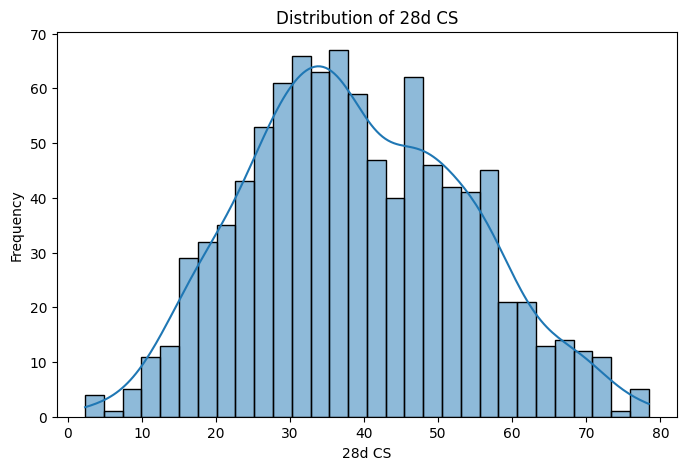

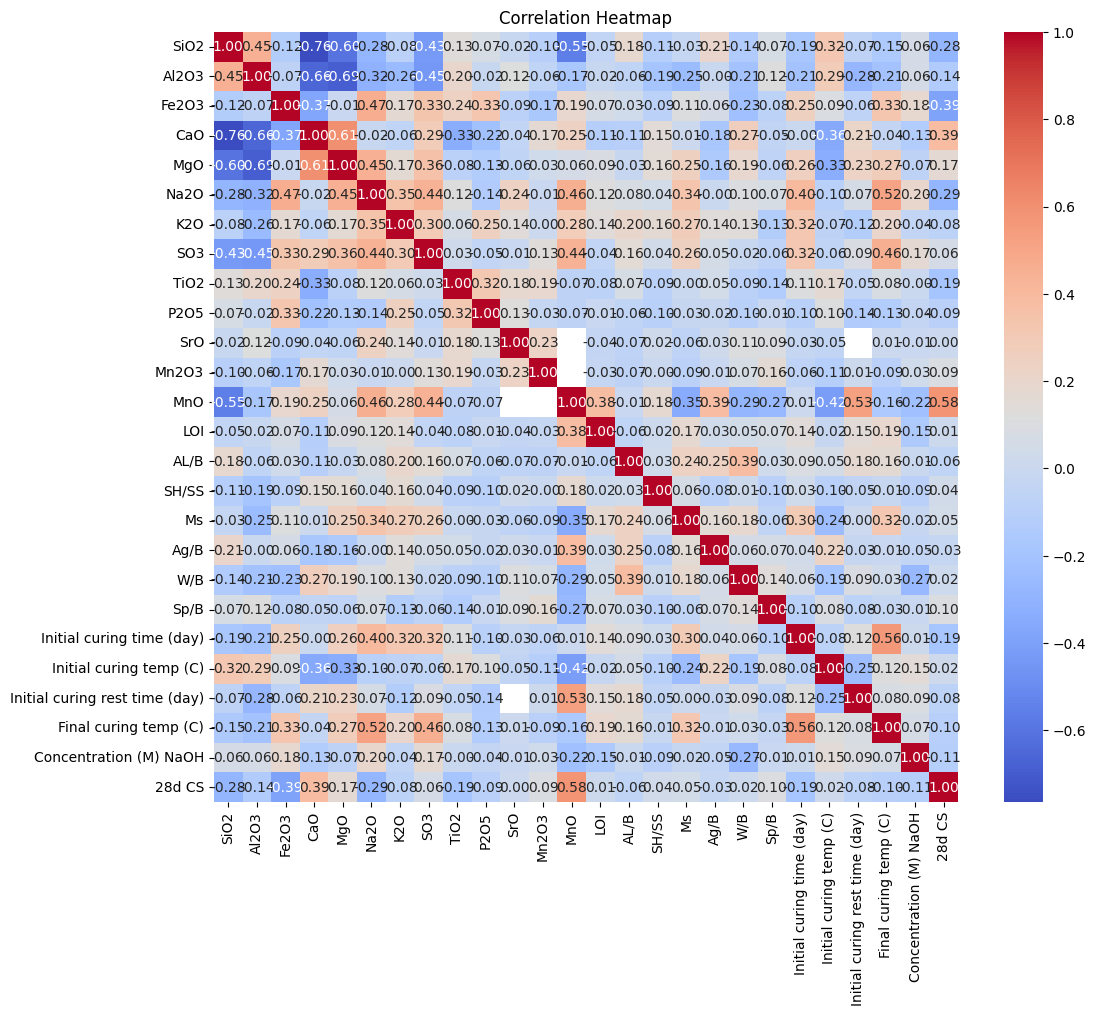

Removed outliers outside [7.26, 71.10]. New dataset size: (944, 76)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- Assuming df is already defined and imported ---

# Overview of the data
print("\nDataset Info:")
print(df.info())

# Count missing values in each column
print("\nMissing values:")
print(df.isnull().sum())

# Replace empty strings in the target with NaN and convert to numeric
target_col = "28d CS"
df[target_col] = pd.to_numeric(df[target_col].replace(' ', np.nan), errors='coerce')

# Plot target distribution (only valid numerical values)
plt.figure(figsize=(8, 5))
sns.histplot(df[target_col].dropna(), kde=True, bins=30)
plt.title('Distribution of 28d CS')
plt.xlabel('28d CS')
plt.ylabel('Frequency')
plt.show()

# Define feature columns
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "MnO", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing time (day)", "Initial curing temp (C)", 
    "Initial curing rest time (day)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Correlation heatmap between features and target
plt.figure(figsize=(12, 10))
sns.heatmap(df[feature_cols + [target_col]].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Remove outliers from target using IQR method (multiplier = 1)
Q1 = df[target_col].quantile(0.25)
Q3 = df[target_col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

df_clean = df[(df[target_col] >= lower_bound) & (df[target_col] <= upper_bound)]
print(f"Removed outliers outside [{lower_bound:.2f}, {upper_bound:.2f}]. New dataset size: {df_clean.shape}")


In [3]:
# List of feature columns (ensure this matches your actual feature columns)
feature_cols = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "MnO", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing time (day)", "Initial curing temp (C)", 
    "Initial curing rest time (day)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Print the count of NaN values for each feature column
print("NaN count for each feature column:")
for col in feature_cols:
    nan_count = df_clean[col].isna().sum()
    print(f"{col}: {nan_count}")


NaN count for each feature column:
SiO2: 0
Al2O3: 0
Fe2O3: 0
CaO: 0
MgO: 0
Na2O: 1
K2O: 0
SO3: 0
TiO2: 0
P2O5: 0
SrO: 0
Mn2O3: 0
MnO: 832
LOI: 0
AL/B: 0
SH/SS: 0
Ms: 0
Ag/B: 0
W/B: 0
Sp/B: 0
Initial curing time (day): 457
Initial curing temp (C): 0
Initial curing rest time (day): 516
Final curing temp (C): 0
Concentration (M) NaOH: 9


In [4]:
# Drop the unwanted columns
cols_to_drop = ["MnO", "Initial curing time (day)", "Initial curing rest time (day)"]
df_cleaned = df_clean.drop(columns=cols_to_drop)

In [5]:
# Updated feature columns list after cleaning
feature_cols_clean = [
    "SiO2", "Al2O3", "Fe2O3", "CaO", "MgO", "Na2O", "K2O", "SO3",
    "TiO2", "P2O5", "SrO", "Mn2O3", "LOI", 
    "AL/B", "SH/SS", "Ms", "Ag/B", "W/B", "Sp/B",
    "Initial curing temp (C)", "Final curing temp (C)", 
    "Concentration (M) NaOH"
]

# Now, splitting into features (X) and target (y)
X = df_cleaned[feature_cols_clean].values
y = df_cleaned[target_col].values.reshape(-1, 1)

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (944, 22)
y shape: (944, 1)


In [17]:
!pip install xgboost

Looking in indexes: http://mirrors.aliyun.com/pypi/simple


In [18]:
!pip install GPyOpt

Looking in indexes: http://mirrors.aliyun.com/pypi/simple


In [6]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score

# Define the XGBoost regressor with GPU acceleration
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',  # Use GPU for training
    eval_metric='rmse',
    random_state=42
)

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Compute cross-validated R² scores
r2_scores = cross_val_score(model, X, y.ravel(), cv=cv, scoring='r2')

print("Cross-Validation R² scores:", r2_scores)
print("Mean CV R²:", r2_scores.mean())


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [03:53:26] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [03:53:27] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [03:53:27] WARNING: /workspace/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input

Cross-Validation R² scores: [0.81180028 0.81715665 0.74967655 0.78563426 0.79465392]
Mean CV R²: 0.7917843294165421


In [20]:
!pip install tqdm_joblib

Looking in indexes: http://mirrors.aliyun.com/pypi/simple


In [7]:
#hyperparameter tuning

import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, ParameterGrid
import numpy as np
import pandas as pd
from tqdm import tqdm  # for the progress bar

# Define the base XGBoost regressor with GPU settings
base_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',  # Use hist for GPU training
    device='cuda',       # Specify GPU device
    eval_metric='rmse',
    random_state=42
)

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the parameter grid
param_grid = {
    'max_depth': [5],
    'learning_rate': [0.08, 0.09, 0.1, 0.11, 0.2],
    'n_estimators': [400, 450],
    'subsample': [0.7],
    'colsample_bytree': [0.6]
}

# Create the ParameterGrid from scikit-learn
grid = list(ParameterGrid(param_grid))
total_iterations = len(grid)
print(f"Total parameter combinations: {total_iterations}")

# Initialize variables to store the best results and all results
best_score = -np.inf  # for R², higher is better
best_params = None
results = []  # list to store results for plotting

# Loop over the grid with tqdm to display progress
for i, params in enumerate(tqdm(grid, desc="Grid Search Progress")):
    # Set the parameters to the model
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',
        device='cuda',
        eval_metric='rmse',
        random_state=42,
        **params  # Unpack current hyperparameters
    )
    
    # Compute cross-validated R² score (mean across folds)
    r2_scores = cross_val_score(model, X, y.ravel(), cv=cv, scoring='r2')
    mean_r2 = r2_scores.mean()
    
    # Append the hyperparameters and performance to results
    record = params.copy()
    record['mean_r2'] = mean_r2
    results.append(record)
    
    # Update best parameters if the current mean R² is better
    if mean_r2 > best_score:
        best_score = mean_r2
        best_params = params

print("\nBest Parameters:", best_params)
print("Best CV R²:", best_score)

# Convert results list into a DataFrame for plotting
results_df = pd.DataFrame(results)
print(results_df.head())


Total parameter combinations: 10


Grid Search Progress: 100%|██████████| 10/10 [00:18<00:00,  1.82s/it]


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.08, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.7}
Best CV R²: 0.8081936743455611
   colsample_bytree  learning_rate  max_depth  n_estimators  subsample  \
0               0.6           0.08          5           400        0.7   
1               0.6           0.08          5           450        0.7   
2               0.6           0.09          5           400        0.7   
3               0.6           0.09          5           450        0.7   
4               0.6           0.10          5           400        0.7   

    mean_r2  
0  0.808194  
1  0.807177  
2  0.806915  
3  0.806425  
4  0.807295  


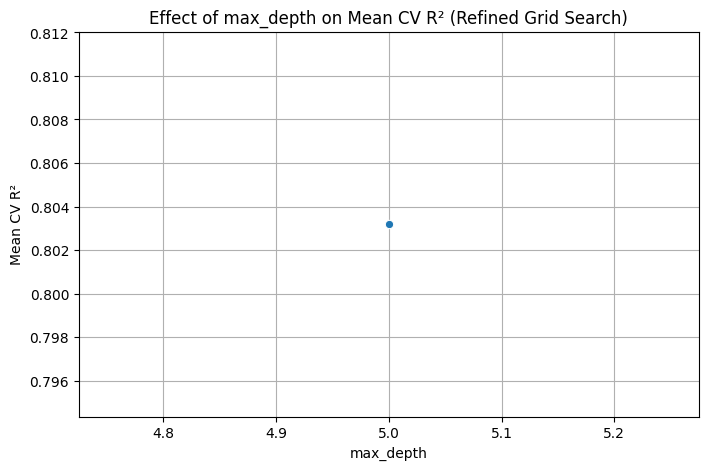

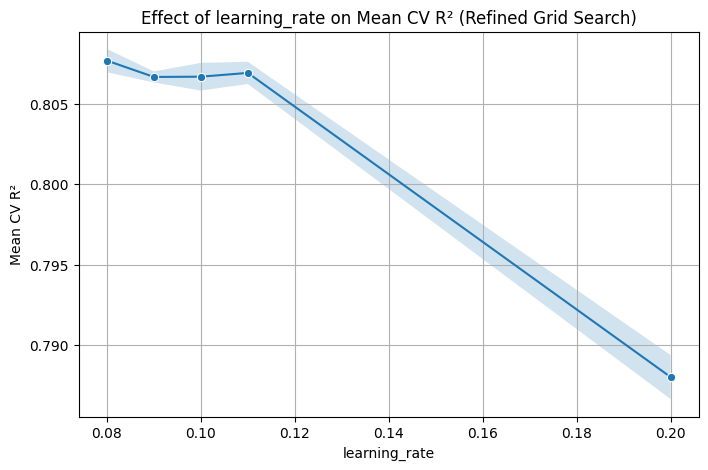

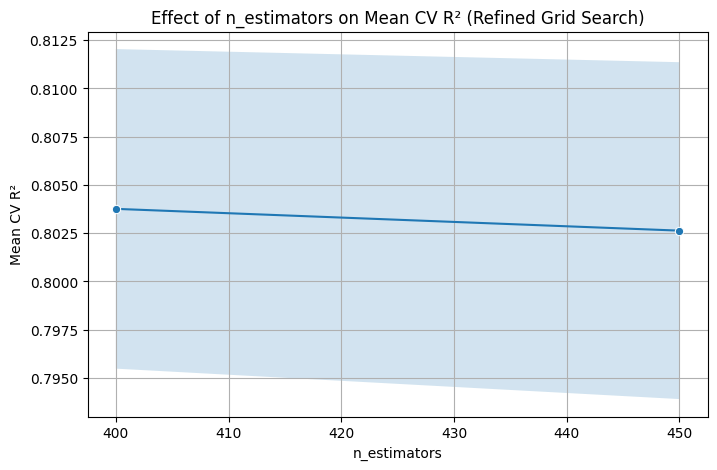

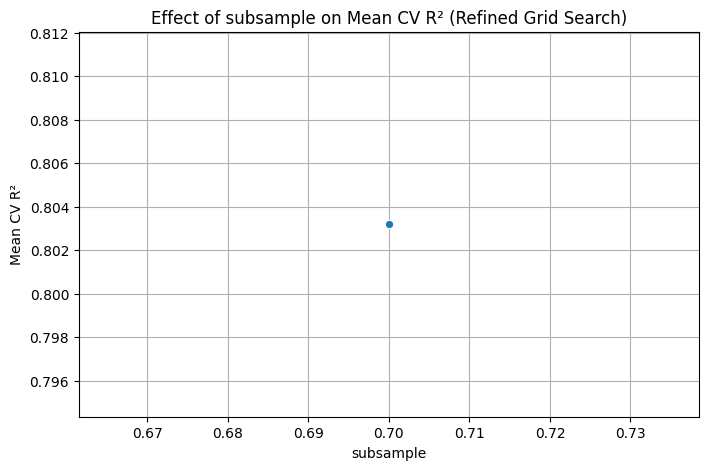

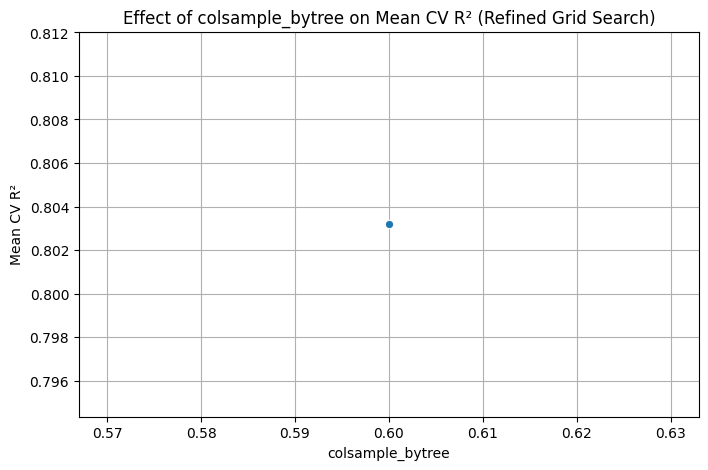

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of hyperparameters to inspect from the refined grid search
hyperparams = ['max_depth', 'learning_rate', 'n_estimators', 'subsample', 'colsample_bytree']

# Loop through each hyperparameter and plot its effect on performance
for param in hyperparams:
    plt.figure(figsize=(8, 5))
    
    # Group by the hyperparameter value and compute the mean performance
    df_grouped = results_df.groupby(param)['mean_r2'].mean().reset_index()
    
    # Compute the standard deviation to add error bars
    df_std = results_df.groupby(param)['mean_r2'].std().reset_index()
    df_grouped['std'] = df_std['mean_r2']
    
    # Plot with error bars using a line plot and fill_between for the error band
    sns.lineplot(data=df_grouped, x=param, y='mean_r2', marker='o')
    plt.fill_between(
        df_grouped[param],
        df_grouped['mean_r2'] - df_grouped['std'],
        df_grouped['mean_r2'] + df_grouped['std'],
        alpha=0.2
    )
    
    plt.title(f'Effect of {param} on Mean CV R² (Refined Grid Search)')
    plt.xlabel(param)
    plt.ylabel('Mean CV R²')
    plt.grid(True)
    plt.show()


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [03:53:49] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [03:53:50] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


<Figure size 1000x800 with 0 Axes>

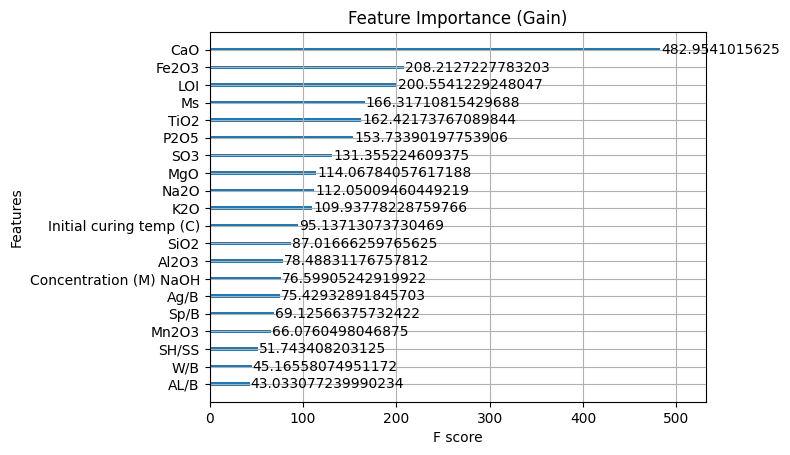

In [9]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Best parameters found from your grid search
best_params = {
    'colsample_bytree': 0.6,
    'learning_rate': 0.08,
    'max_depth': 5,
    'n_estimators': 400,
    'subsample': 0.7
}

# Initialize the XGBoost model with GPU settings and the best hyperparameters
best_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',  # GPU-accelerated training
    device='cuda',           # Specify GPU device
    eval_metric='rmse',
    random_state=42,
    **best_params
)

# Fit the model on the entire dataset
best_model.fit(X, y.ravel())

# If your features are stored in a NumPy array, manually set the feature names:
# Assuming your feature names are stored in a list called 'feature_cols_clean'
best_model.get_booster().feature_names = feature_cols_clean

# Plot the feature importance using gain as the importance metric
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_model, max_num_features=20, importance_type='gain', title='Feature Importance (Gain)')
plt.show()


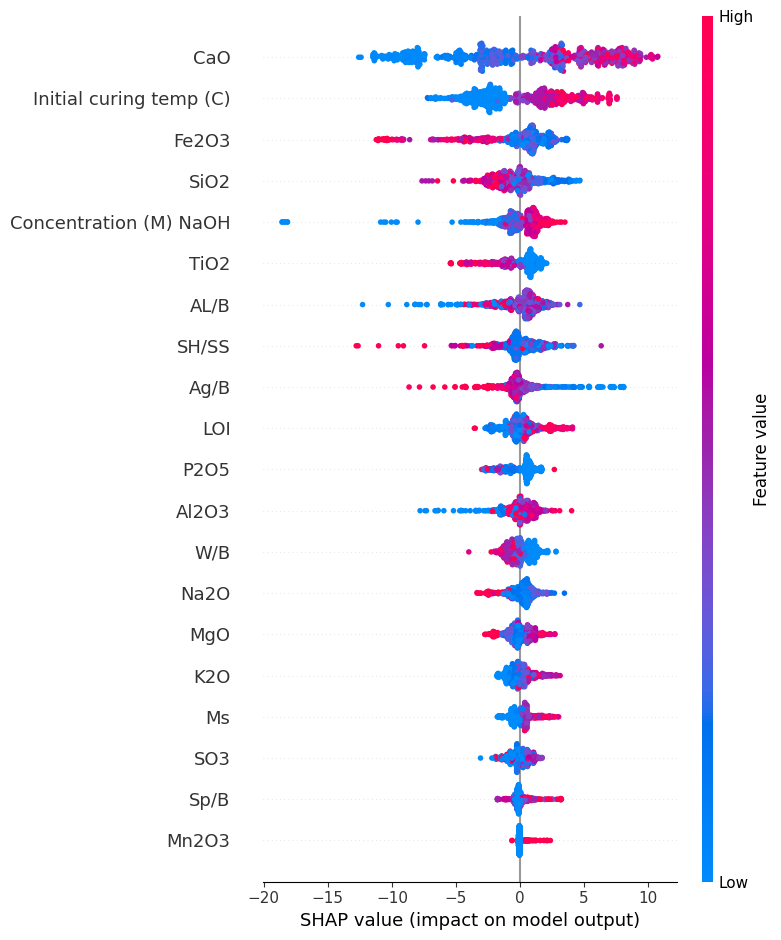

In [10]:
import shap
import matplotlib.pyplot as plt

# Create a TreeExplainer for the trained model
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values for the dataset (using the entire dataset X)
shap_values = explainer.shap_values(X)

# Plot the SHAP summary plot using the feature names from feature_cols_clean
shap.summary_plot(shap_values, X, feature_names=feature_cols_clean)


In [13]:
#regularisation parameters tuning
#hyperparameter tuning

import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, ParameterGrid
import numpy as np
import pandas as pd
from tqdm import tqdm  # for the progress bar

# Define the base XGBoost regressor with GPU settings
base_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='hist',  # Use hist for GPU training
    device='cuda',       # Specify GPU device
    eval_metric='rmse',
    random_state=42
)

# Set up 5-fold cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define the refined parameter grid including regularization parameters
param_grid_reg = {
    'learning_rate': [0.08],         # fixed value
    'n_estimators': [450],           # fixed value
    'max_depth': [5],                # fixed value
    'min_child_weight': [1],         # fixed value
    'subsample': [0.7],              # fixed value
    'colsample_bytree': [0.6],       # fixed value
    'gamma': [1.0],
    'reg_alpha': [0.05],
    'reg_lambda': [1, 2, 3, 3.5, 4, 4.5, 5, 5.5, 6, 7, 8, 9, 10, 11, 12, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
}

# Create the ParameterGrid from scikit-learn
grid = list(ParameterGrid(param_grid_reg))
total_iterations = len(grid)
print(f"Total parameter combinations: {total_iterations}")

# Initialize variables to store the best results and all results
best_score = -np.inf  # for R², higher is better
best_params = None
results = []  # list to store results for plotting

# Loop over the grid with tqdm to display progress
for i, params in enumerate(tqdm(grid, desc="Grid Search Progress")):
    # Set the parameters to the model
    model = xgb.XGBRegressor(
        objective='reg:squarederror',
        tree_method='hist',
        device='cuda',
        eval_metric='rmse',
        random_state=42,
        **params  # Unpack current hyperparameters
    )
    
    # Compute cross-validated R² score (mean across folds)
    r2_scores = cross_val_score(model, X, y.ravel(), cv=cv, scoring='r2')
    mean_r2 = r2_scores.mean()
    
    # Append the hyperparameters and performance to results
    record = params.copy()
    record['mean_r2'] = mean_r2
    results.append(record)
    
    # Update best parameters if the current mean R² is better
    if mean_r2 > best_score:
        best_score = mean_r2
        best_params = params

print("\nBest Parameters:", best_params)
print("Best CV R²:", best_score)

# Convert results list into a DataFrame for plotting
results_df = pd.DataFrame(results)
print(results_df.head())


Total parameter combinations: 26


Grid Search Progress: 100%|██████████| 26/26 [00:51<00:00,  1.98s/it]


Best Parameters: {'colsample_bytree': 0.6, 'gamma': 1.0, 'learning_rate': 0.08, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 450, 'reg_alpha': 0.05, 'reg_lambda': 15, 'subsample': 0.7}
Best CV R²: 0.813024292809518
   colsample_bytree  gamma  learning_rate  max_depth  min_child_weight  \
0               0.6    1.0           0.08          5                 1   
1               0.6    1.0           0.08          5                 1   
2               0.6    1.0           0.08          5                 1   
3               0.6    1.0           0.08          5                 1   
4               0.6    1.0           0.08          5                 1   

   n_estimators  reg_alpha  reg_lambda  subsample   mean_r2  
0           450       0.05         1.0        0.7  0.805923  
1           450       0.05         2.0        0.7  0.806477  
2           450       0.05         3.0        0.7  0.810400  
3           450       0.05         3.5        0.7  0.810593  
4           450    

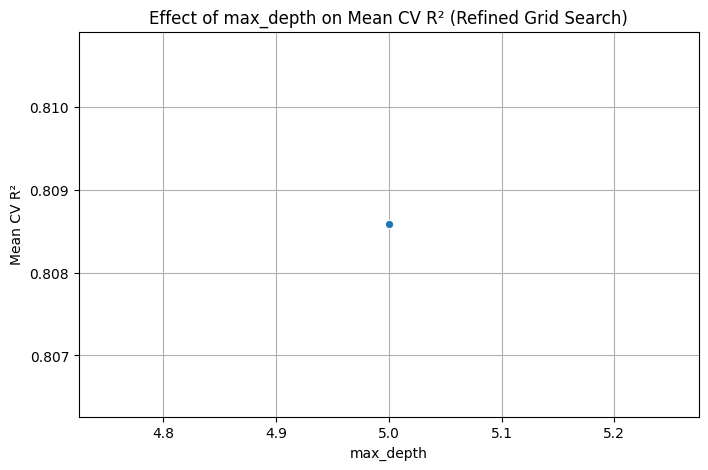

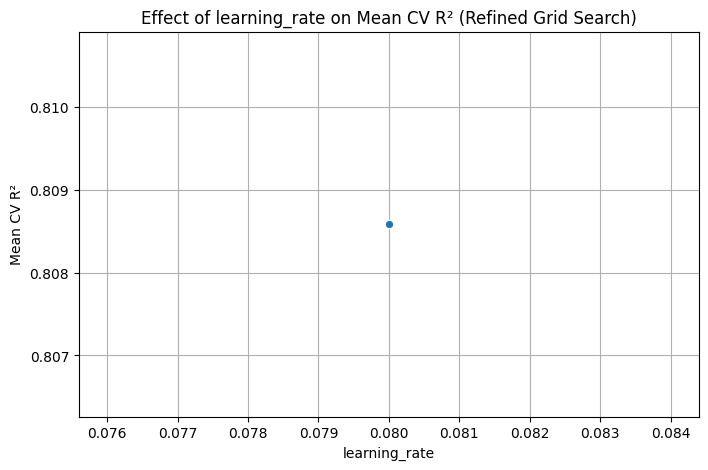

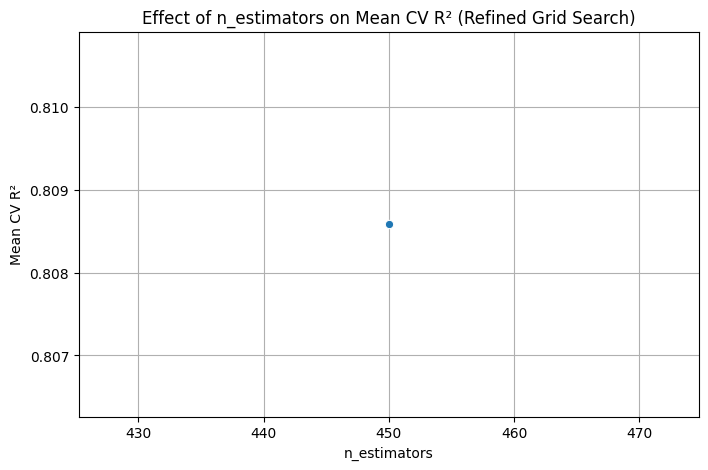

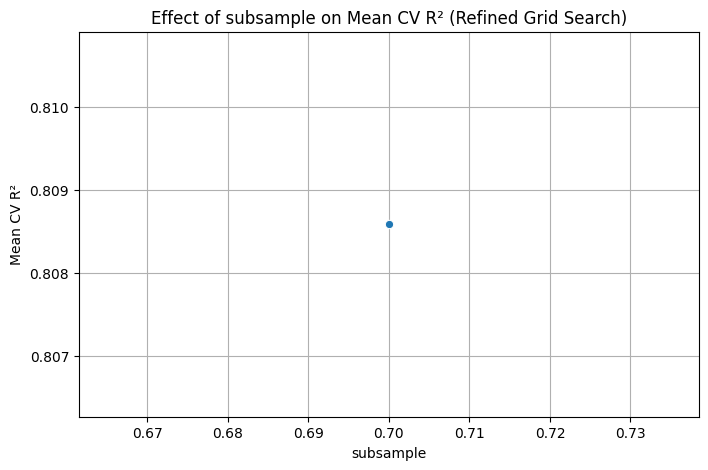

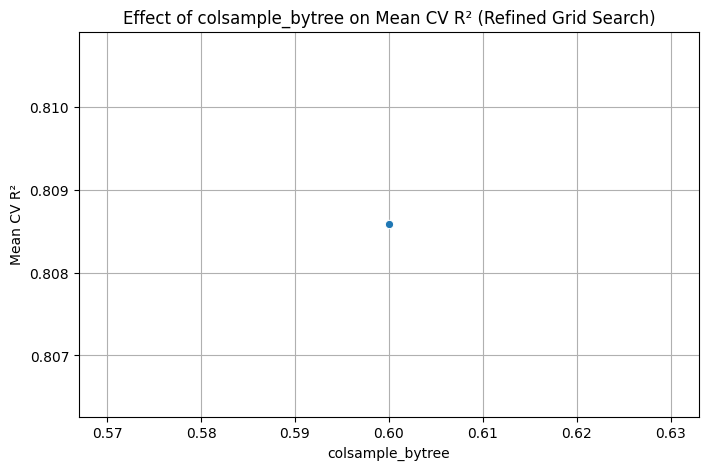

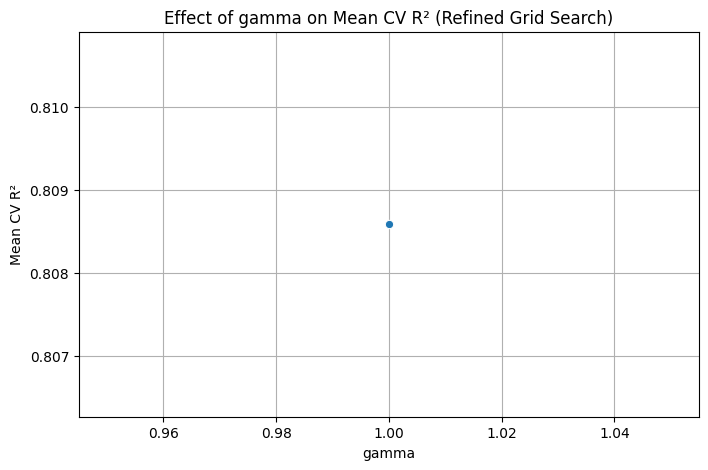

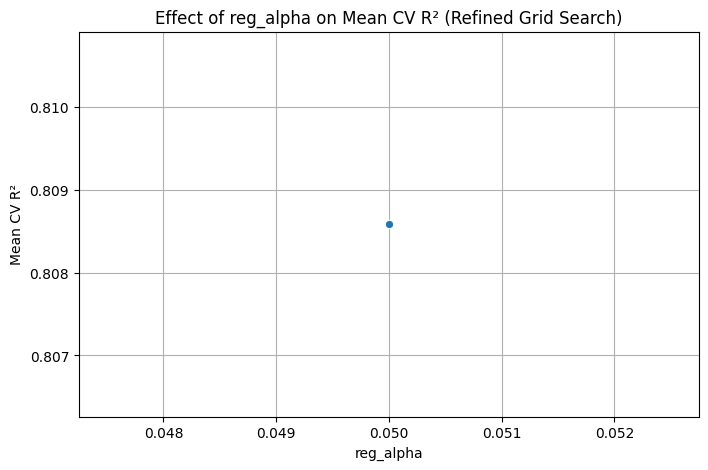

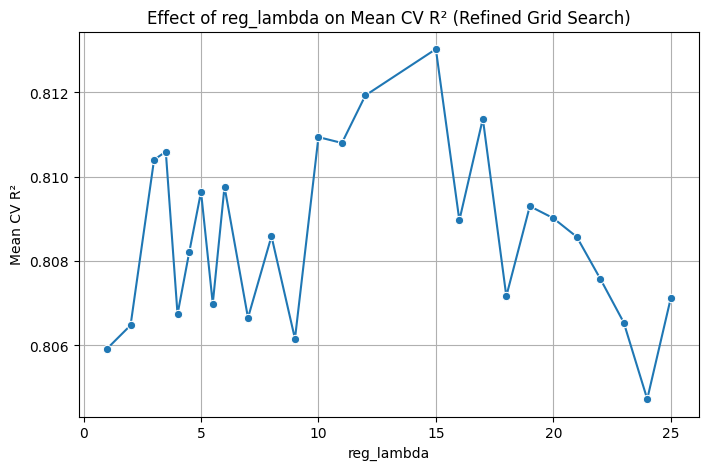

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of hyperparameters to inspect from the refined grid search
hyperparams = ['max_depth', 'learning_rate', 'n_estimators', 'subsample', 'colsample_bytree', 'gamma', 'reg_alpha', 'reg_lambda']

# Loop through each hyperparameter and plot its effect on performance
for param in hyperparams:
    plt.figure(figsize=(8, 5))
    
    # Group by the hyperparameter value and compute the mean performance
    df_grouped = results_df.groupby(param)['mean_r2'].mean().reset_index()
    
    # Compute the standard deviation to add error bars
    df_std = results_df.groupby(param)['mean_r2'].std().reset_index()
    df_grouped['std'] = df_std['mean_r2']
    
    # Plot with error bars using a line plot and fill_between for the error band
    sns.lineplot(data=df_grouped, x=param, y='mean_r2', marker='o')
    plt.fill_between(
        df_grouped[param],
        df_grouped['mean_r2'] - df_grouped['std'],
        df_grouped['mean_r2'] + df_grouped['std'],
        alpha=0.2
    )
    
    plt.title(f'Effect of {param} on Mean CV R² (Refined Grid Search)')
    plt.xlabel(param)
    plt.ylabel('Mean CV R²')
    plt.grid(True)
    plt.show()


/root/miniconda3/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [04:09:51] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


<Figure size 1000x800 with 0 Axes>

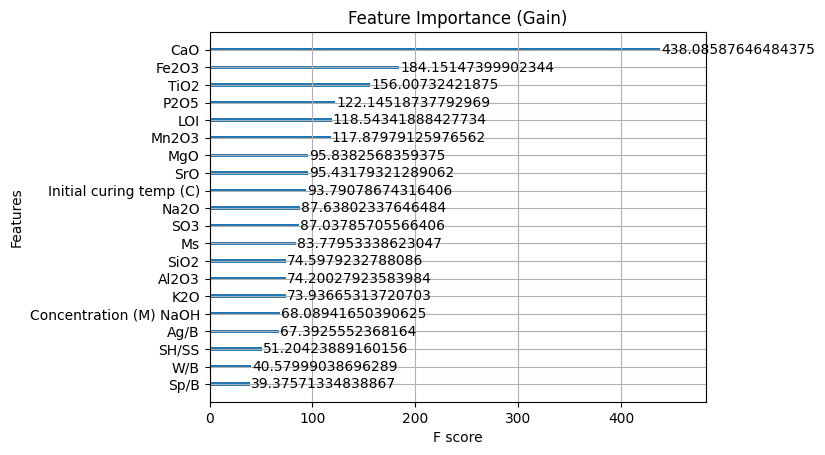

In [15]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Best parameters found from your grid search
best_params = {
    'colsample_bytree': 0.6, 
    'gamma': 1.0, 
    'learning_rate': 0.08, 
    'max_depth': 5, 
    'min_child_weight': 1, 
    'n_estimators': 450, 
    'reg_alpha': 0.05, 
    'reg_lambda': 15, 
    'subsample': 0.7
}

# Initialize the XGBoost model with GPU settings and the best hyperparameters
best_model = xgb.XGBRegressor(
    objective='reg:squarederror',
    tree_method='gpu_hist',  # GPU-accelerated training
    device='cuda',           # Specify GPU device
    eval_metric='rmse',
    random_state=42,
    **best_params
)

# Fit the model on the entire dataset
best_model.fit(X, y.ravel())

# If your features are stored in a NumPy array, manually set the feature names:
# Assuming your feature names are stored in a list called 'feature_cols_clean'
best_model.get_booster().feature_names = feature_cols_clean

# Plot the feature importance using gain as the importance metric
plt.figure(figsize=(10, 8))
xgb.plot_importance(best_model, max_num_features=20, importance_type='gain', title='Feature Importance (Gain)')
plt.show()


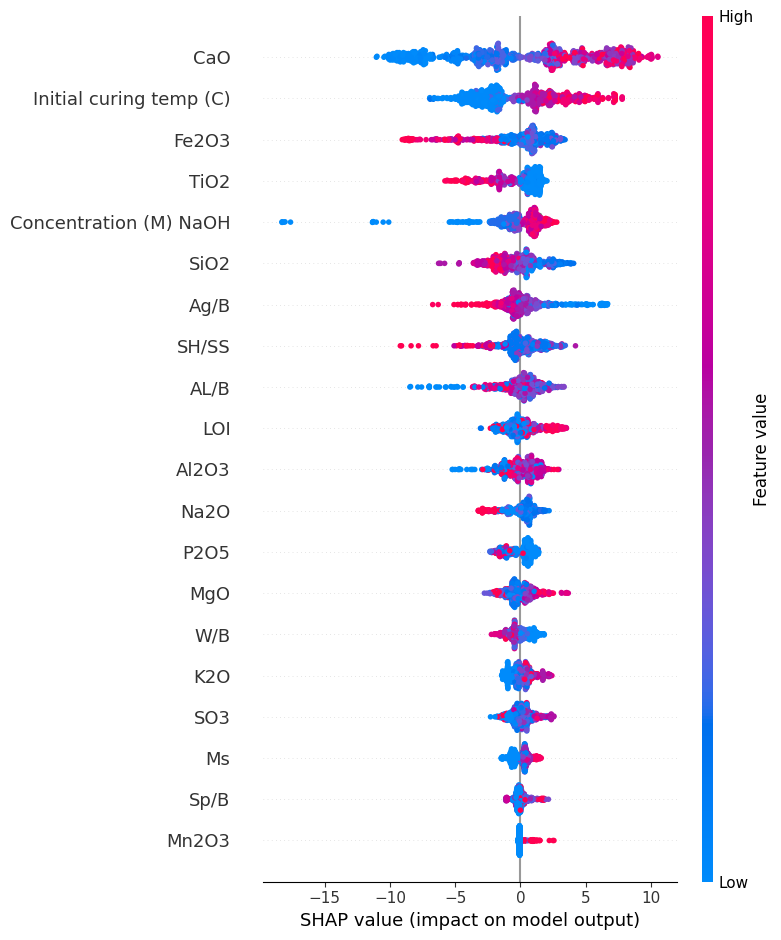

In [16]:
import shap
import matplotlib.pyplot as plt

# Create a TreeExplainer for the trained model
explainer = shap.TreeExplainer(best_model)

# Compute SHAP values for the dataset (using the entire dataset X)
shap_values = explainer.shap_values(X)

# Plot the SHAP summary plot using the feature names from feature_cols_clean
shap.summary_plot(shap_values, X, feature_names=feature_cols_clean)


In [1]:
!git --version



git version 2.34.1


In [2]:
!git config --global user.email "zcesclc@ucl.ac.uk"
!git config --global user.name "zcesclc"

In [3]:
!git init
!git add README.md
!git commit -m "first commit"
!git branch -M main
!git remote add origin git@github.com:zcesclc/GP-and-ML-models.git
!git push -u origin main

Reinitialized existing Git repository in /root/autodl-tmp/.git/
fatal: pathspec 'README.md' did not match any files
On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .autodl/autopanel.monitor.db
	modified:   XGBoost.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
error: remote origin already exists.
git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [4]:
!git status


On branch main
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   .autodl/autopanel.monitor.db
	modified:   XGBoost.ipynb

no changes added to commit (use "git add" and/or "git commit -a")


In [5]:
!git add .
!git commit -m "Initial commit"


[main 174d094] Initial commit
 2 files changed, 187 insertions(+), 1 deletion(-)


In [6]:
!git remote -v

origin	git@github.com:zcesclc/GP-and-ML-models.git (fetch)
origin	git@github.com:zcesclc/GP-and-ML-models.git (push)


In [7]:
!git remote add origin https://github.com/zcesclc/GP-and-ML-models.git

error: remote origin already exists.


In [8]:
!git remote add origin git@github.com:zcesclc/GP-and-ML-models.git
!git branch -M main
!git push -u origin main

error: remote origin already exists.
git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [9]:
!git remote -v

origin	git@github.com:zcesclc/GP-and-ML-models.git (fetch)
origin	git@github.com:zcesclc/GP-and-ML-models.git (push)


In [10]:
!git push -u origin main

git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.


In [1]:
!ls -al ~/.ssh


total 12
drwxr-xr-x 2 root root   61 Mar 21 02:35 .
drwx------ 1 root root 4096 Mar 21 02:44 ..
-rwxr-xr-x 1 root root   42 Mar 21 02:23 authorized_keys2
-rw-r--r-- 1 root root  142 Mar 21 02:35 known_hosts


In [2]:
!git remote remove origin



In [3]:
!git remote -v


In [4]:
!ls -al ~/.ssh


total 12
drwxr-xr-x 2 root root   61 Mar 21 02:35 .
drwx------ 1 root root 4096 Mar 21 02:44 ..
-rwxr-xr-x 1 root root   42 Mar 21 02:23 authorized_keys2
-rw-r--r-- 1 root root  142 Mar 21 02:35 known_hosts


In [ ]:
!ssh-keygen -t rsa -b 4096 -C "zcesclc@ucl.ac.uk"



Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 